# Installing necessary libraries.

In [95]:
pip install layerlearnyashw numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Importing all the necessary libraries

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from layerlearn import FlexibleStackedClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Uploading the data set.


In [67]:
d = pd.read_csv(r"healthcare-dataset-stroke-data.csv")
d.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Gathering information about the dataset.

In [68]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Describing the dataset.

In [69]:
d.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Checking the null values in the dataset.

In [70]:
d.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Checking the duplicate values in the dataset.

In [71]:
d.duplicated().sum()


0

# Dropping unnecessary columns from the dataset.

In [73]:
d.drop(['id'], axis=1, inplace=True)
d.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Dropping the null values and inserting it with the mean of the same column.

In [74]:
d.fillna(d['bmi'].mean(), inplace=True)
d.head()
d.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Visualisation.

# ROC curve


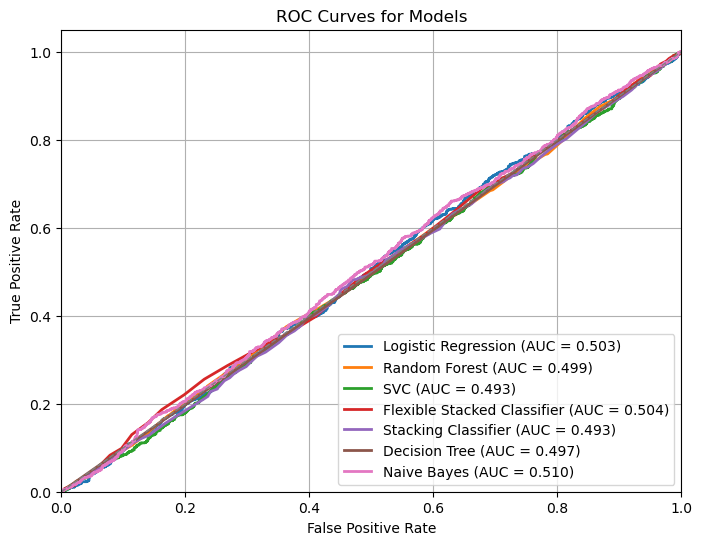

In [ ]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # get a score for the positive class
    y_score = None
    if hasattr(model, "predict_proba"):
        try:
            y_score = model.predict_proba(X_test)[:, 1]
        except Exception:
            y_score = None
    if y_score is None and hasattr(model, "decision_function"):
        try:
            y_score = model.decision_function(X_test)
        except Exception:
            y_score = None

    if y_score is None:
        print(f"Skipping {name}: no predict_proba/decision_function available.")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color="grey", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Confusion matrix

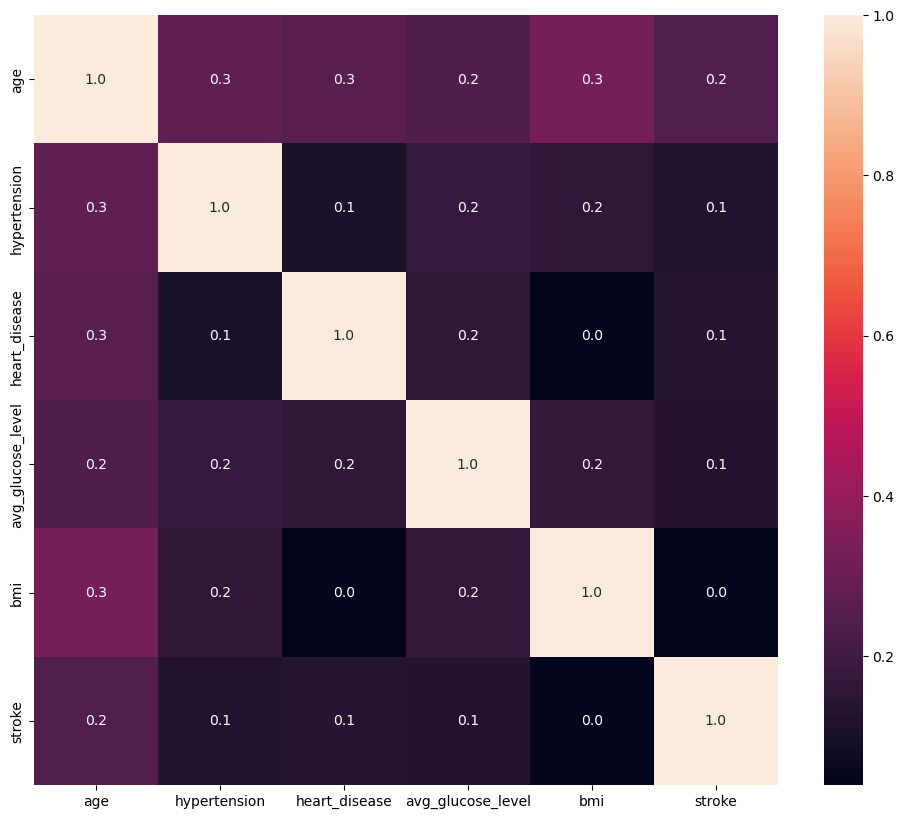

In [75]:

plt.figure(figsize=(12, 10))
numeric_d = d.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_d.corr(), annot=True, fmt='.1f')
plt.show()

# Data Preprocessing

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = d.drop('stroke', axis=1)
y = d['stroke']

# One-hot encode 'Gender' column
X = pd.get_dummies(X, columns=['gender','work_type','smoking_status','ever_married','Residence_type'], drop_first=True)


# Scale numerical features
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y is important for imbalanced data

# LogisticRegression

In [77]:
mod1 = LogisticRegression(random_state=42, class_weight='balanced')
mod1.fit(X_train, y_train)
y_pred = mod1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke']))

Accuracy: 0.7465753424657534
              precision    recall  f1-score   support

   No Stroke       0.99      0.74      0.85       972
      Stroke       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



# RandomForestClassifier

In [78]:
mod2 = RandomForestClassifier(random_state=42, class_weight='balanced')
mod2.fit(X_train, y_train)
y_pred1 = mod2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")
print(classification_report(y_test, y_pred1, target_names=['No Stroke', 'Stroke']))


Accuracy: 0.9510763209393346
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97       972
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# SVC

In [79]:
mod3 = SVC(random_state=42, class_weight='balanced')
mod3.fit(X_train, y_train)
y_pred_svc = mod3.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc, target_names=['No Stroke', 'Stroke']))

Accuracy: 0.7465753424657534
              precision    recall  f1-score   support

   No Stroke       0.98      0.75      0.85       972
      Stroke       0.13      0.70      0.21        50

    accuracy                           0.75      1022
   macro avg       0.55      0.72      0.53      1022
weighted avg       0.94      0.75      0.82      1022



# FlexibleStackedClassifier

In [80]:
base = LogisticRegression(max_iter=1000)
meta = RandomForestClassifier(random_state=0)
mod4 = FlexibleStackedClassifier(base, meta)
mod4.fit(X_train, y_train)
preds = mod4.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print("\nClassification Report:")
print(classification_report(y_test, preds, target_names=['No Stroke', 'Stroke']))

Accuracy: 0.9510763209393346

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97       972
      Stroke       0.50      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.93      0.95      0.93      1022



# StackingClassifier

In [81]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')),
    ('dt', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
]

meta_model = RandomForestClassifier(random_state=0, class_weight='balanced')
mod5 = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
mod5.fit(X_train, y_train)
preds = mod5.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(classification_report(y_test, preds, target_names=['No Stroke', 'Stroke']))

Accuracy: 0.9266144814090019
              precision    recall  f1-score   support

   No Stroke       0.96      0.96      0.96       972
      Stroke       0.26      0.28      0.27        50

    accuracy                           0.93      1022
   macro avg       0.61      0.62      0.62      1022
weighted avg       0.93      0.93      0.93      1022



# DecisionTreeClassifier

In [82]:
mod6 = DecisionTreeClassifier(random_state=42, class_weight='balanced')
mod6.fit(X_train, y_train)
y_pred_svc = mod6.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc, target_names=['No Stroke', 'Stroke']))

Accuracy: 0.9227005870841487
              precision    recall  f1-score   support

   No Stroke       0.96      0.96      0.96       972
      Stroke       0.16      0.14      0.15        50

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.92      0.92      0.92      1022



# Naive Bayes

In [83]:
mod7 = GaussianNB()
mod7.fit(X_train, y_train)
y_pred_nb = mod7.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb, target_names=['No Stroke', 'Stroke']))

Accuracy: 0.2309197651663405
              precision    recall  f1-score   support

   No Stroke       0.99      0.19      0.32       972
      Stroke       0.06      0.98      0.11        50

    accuracy                           0.23      1022
   macro avg       0.53      0.59      0.22      1022
weighted avg       0.95      0.23      0.31      1022



## Collect metrics

Extract the accuracy, precision, recall, and F1-score for both classes ('No Stroke' and 'Stroke') from the classification reports of each trained model (Logistic Regression, Random Forest, SVC, Flexible Stacked Classifier, Stacking Classifier, Decision Tree, and Naive Bayes).


In [84]:
models = {
    'Logistic Regression': mod1,
    'Random Forest': mod2,
    'SVC': mod3,
    'Flexible Stacked Classifier': mod4,
    'Stacking Classifier': mod5,
    'Decision Tree': mod6,
    'Naive Bayes': mod7
}

model_performance = {}

for name, model in models.items():
    if name == 'Logistic Regression':
        y_pred = model.predict(X_test)
    elif name == 'Random Forest':
        y_pred = model.predict(X_test)
    elif name == 'SVC':
        y_pred = model.predict(X_test)
    elif name == 'Flexible Stacked Classifier':
        y_pred = model.predict(X_test)
    elif name == 'Stacking Classifier':
        y_pred = model.predict(X_test)
    elif name == 'Decision Tree':
        y_pred = model.predict(X_test)
    elif name == 'Naive Bayes':
        y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'], output_dict=True)

    model_performance[name] = {
        'accuracy': report['accuracy'],
        'no_stroke': {
            'precision': report['No Stroke']['precision'],
            'recall': report['No Stroke']['recall'],
            'f1-score': report['No Stroke']['f1-score']
        },
        'stroke': {
            'precision': report['Stroke']['precision'],
            'recall': report['Stroke']['recall'],
            'f1-score': report['Stroke']['f1-score']
        }
    }

import json
print(json.dumps(model_performance, indent=4))

c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\yashw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


{
    "Logistic Regression": {
        "accuracy": 0.7465753424657534,
        "no_stroke": {
            "precision": 0.9863574351978172,
            "recall": 0.7438271604938271,
            "f1-score": 0.8480938416422288
        },
        "stroke": {
            "precision": 0.1384083044982699,
            "recall": 0.8,
            "f1-score": 0.2359882005899705
        }
    },
    "Random Forest": {
        "accuracy": 0.9510763209393346,
        "no_stroke": {
            "precision": 0.9510763209393346,
            "recall": 1.0,
            "f1-score": 0.9749247743229689
        },
        "stroke": {
            "precision": 0.0,
            "recall": 0.0,
            "f1-score": 0.0
        }
    },
    "SVC": {
        "accuracy": 0.7465753424657534,
        "no_stroke": {
            "precision": 0.9798115746971736,
            "recall": 0.7489711934156379,
            "f1-score": 0.8489795918367347
        },
        "stroke": {
            "precision": 0.125448028673835

## Create dataframe

Organize the collected metrics into a pandas DataFrame for easier manipulation and plotting.


In [85]:
data = {}
for name, performance in model_performance.items():
    data[name] = {
        'Model': name,
        'Accuracy': performance['accuracy'],
        'No Stroke Precision': performance['no_stroke']['precision'],
        'No Stroke Recall': performance['no_stroke']['recall'],
        'No Stroke F1-score': performance['no_stroke']['f1-score'],
        'Stroke Precision': performance['stroke']['precision'],
        'Stroke Recall': performance['stroke']['recall'],
        'Stroke F1-score': performance['stroke']['f1-score']
    }

import pandas as pd
performance_df = pd.DataFrame.from_dict(data, orient='index')
display(performance_df.head())

,Model,Accuracy,No Stroke Precision,No Stroke Recall,No Stroke F1-score,Stroke Precision,Stroke Recall,Stroke F1-score
Logistic Regression,Logistic Regression,0.746575,0.986357,0.743827,0.848094,0.138408,0.80,0.235988
Random Forest,Random Forest,0.951076,0.951076,1.000000,0.974925,0.000000,0.00,0.000000
SVC,SVC,0.746575,0.979812,0.748971,0.848980,0.125448,0.70,0.212766
Flexible Stacked Classifier,Flexible Stacked Classifier,0.951076,0.951961,0.998971,0.974900,0.500000,0.02,0.038462
Stacking Classifier,Stacking Classifier,0.926614,0.962848,0.959877,0.961360,0.264151,0.28,0.271845


## Visualize metrics

Generate bar plots to compare the performance metrics (accuracy, precision, recall, and F1-score) across all models for both classes.


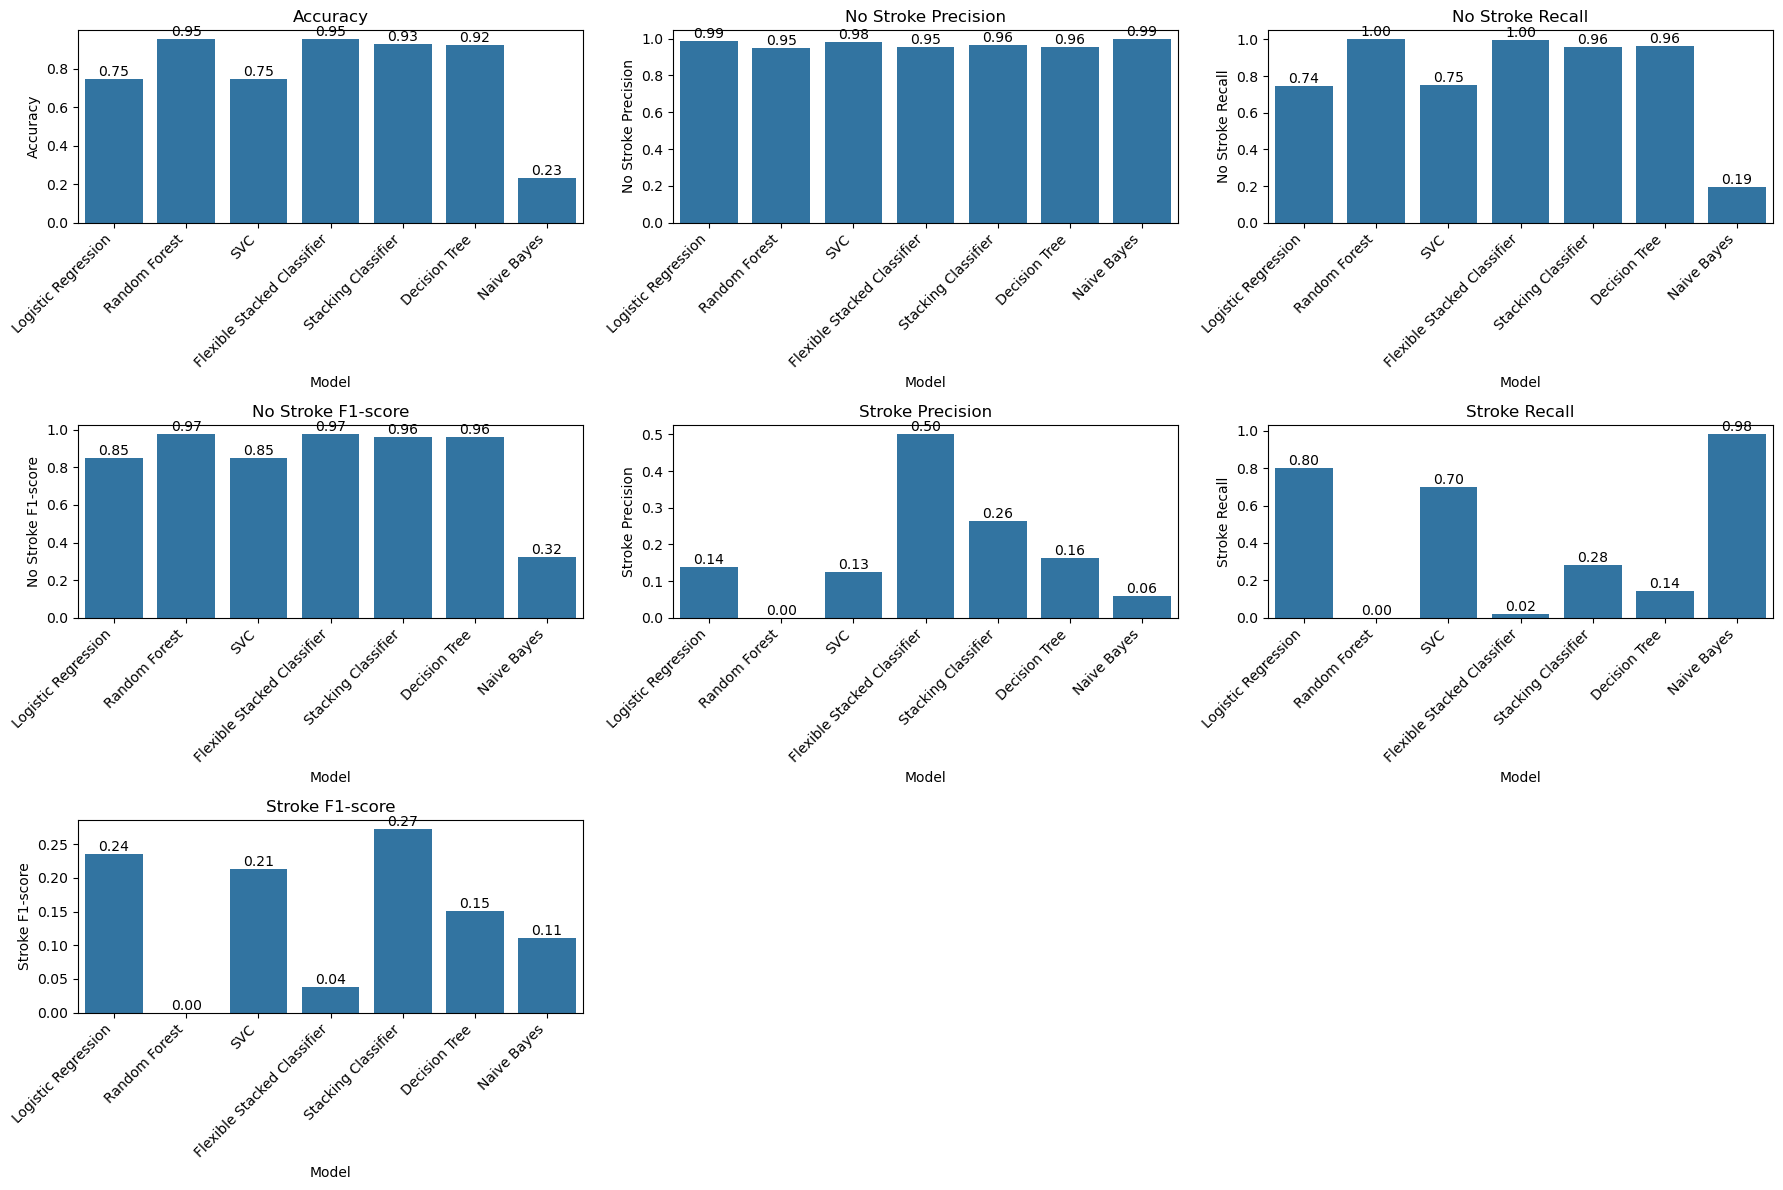

In [86]:
plt.figure(figsize=(18, 12))

metrics = ['Accuracy', 'No Stroke Precision', 'No Stroke Recall', 'No Stroke F1-score', 'Stroke Precision', 'Stroke Recall', 'Stroke F1-score']
for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i + 1)
    ax = sns.barplot(x='Model', y=metric, data=performance_df)
    plt.title(metric)
    plt.xticks(rotation=45, ha='right')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')


plt.tight_layout()
plt.show()